# $$\text{AE102 PROJECT TEAM BAYTEX}$$
### Topic: Oil & Stocks in Covid

Contributors: 
<br> Vighnesh JR (210010073)
<br> Shantanu Welling (210010076)
<br> Sahil Kale

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv('AE102data.csv',sep=',')
Data.head()

,Index,Date,xom,rr,pc,chev,barrel
0,1,02-01-2020,61.174892,418.58,44.31,108.0606,61.17
1,2,03-01-2020,60.683086,417.39,44.76,107.6868,63.00
2,3,06-01-2020,61.149010,414.09,46.27,107.3220,63.27
3,4,07-01-2020,60.648567,421.60,45.83,105.9515,62.70
4,5,08-01-2020,59.733967,433.79,44.89,104.7412,59.65


In [3]:
Data = Data.drop(['Index'],axis=1)
Data = Data.drop(['rr'],axis=1)

In [4]:
Data.head()

,Date,xom,pc,chev,barrel
0,02-01-2020,61.174892,44.31,108.0606,61.17
1,03-01-2020,60.683086,44.76,107.6868,63.00
2,06-01-2020,61.149010,46.27,107.3220,63.27
3,07-01-2020,60.648567,45.83,105.9515,62.70
4,08-01-2020,59.733967,44.89,104.7412,59.65


In [5]:
xom = Data['xom'].to_numpy()
pc = Data['pc'].to_numpy()
chev = Data['chev'].to_numpy()
barrel = Data['barrel'].to_numpy()
days=np.array([i for i in range(1,104)])

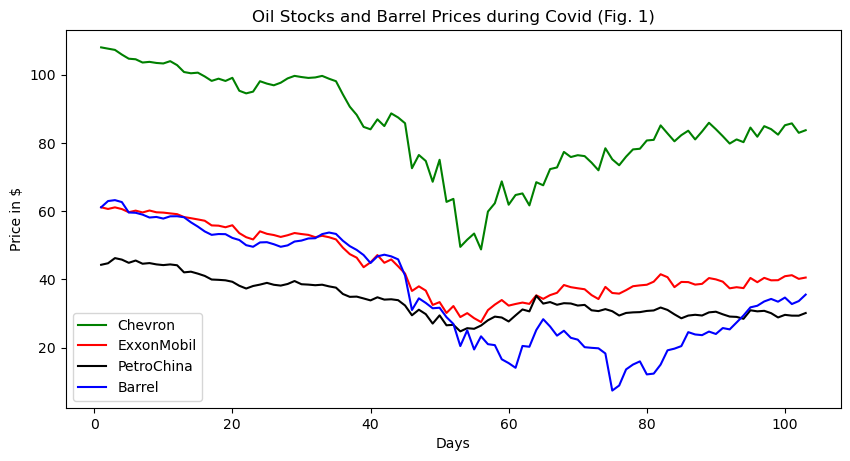

In [6]:
v=[1]
global v
plt.figure(figsize=(10,5),dpi=100)
plt.title(f"Oil Stocks and Barrel Prices during Covid (Fig. {v[0]})")
plt.plot(days,chev,'g')
plt.plot(days,xom, 'r')
plt.plot(days,pc,'k')
plt.plot(days,barrel, 'b')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["Chevron", "ExxonMobil","PetroChina", "Barrel"],loc="lower left")
plt.show()
v[0]+=1

In [7]:
def charvar(Dat):
    plt.hist(Dat, bins=25)
    plt.xlabel("Bins")
    plt.ylabel("Count")
    if (Dat[0]==chev[0]):
        title1="Chevron"
    elif (Dat[0]==pc[0]):
        title1="PetroChina"
    elif(Dat[0]==xom[0]):
        title1="ExxonMobil"
    else:
        title1="Barrel"
    plt.title(f"Histogram of RV {title1} (Fig. {v[0]})")
    v[0]+=1
    plt.show()
    m2=np.mean(Dat)
    s2=np.std(Dat)
    print(f"Mean of RV {title1} is {m2}")
    print(f"Standard deviation of RV {title1} is {s2}")
    return

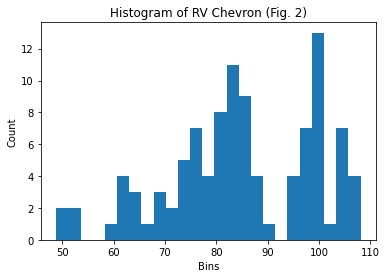

Mean of RV Chevron is 84.70791271844661
Standard deviation of RV Chevron is 14.231432666401195


In [8]:
charvar(chev)

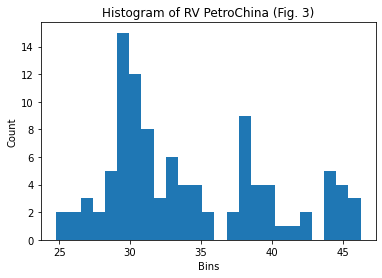

Mean of RV PetroChina is 34.16611650485437
Standard deviation of RV PetroChina is 5.644546338286842


In [9]:
charvar(pc)

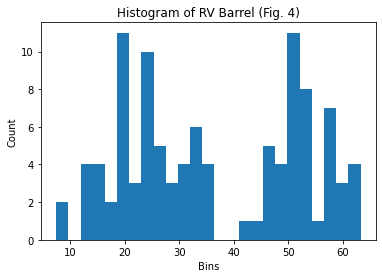

Mean of RV Barrel is 36.64019417475728
Standard deviation of RV Barrel is 15.908580085936196


In [10]:
charvar(barrel)

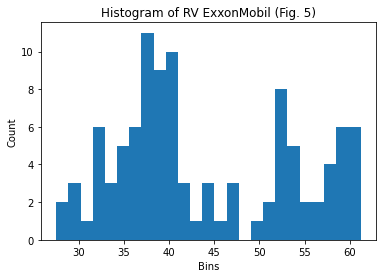

Mean of RV ExxonMobil is 44.0843103592233
Standard deviation of RV ExxonMobil is 9.683727519586174


In [11]:
charvar(xom)

In [12]:
def comp_fit(x,cp,cl):
    b1,b0=np.polyfit(barrel,x,1)
    yis=b0 + b1*barrel
    plt.plot(yis,barrel,cl)
    plt.plot(x,barrel,cp,markersize=5)

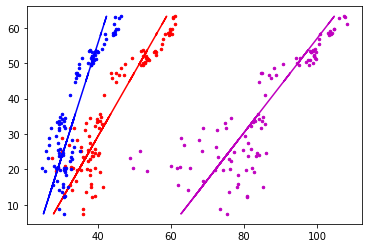

In [13]:
comp_fit(chev,"m.","m-")
comp_fit(xom,"r.","r")
comp_fit(pc,"b.","b")
plt.show()

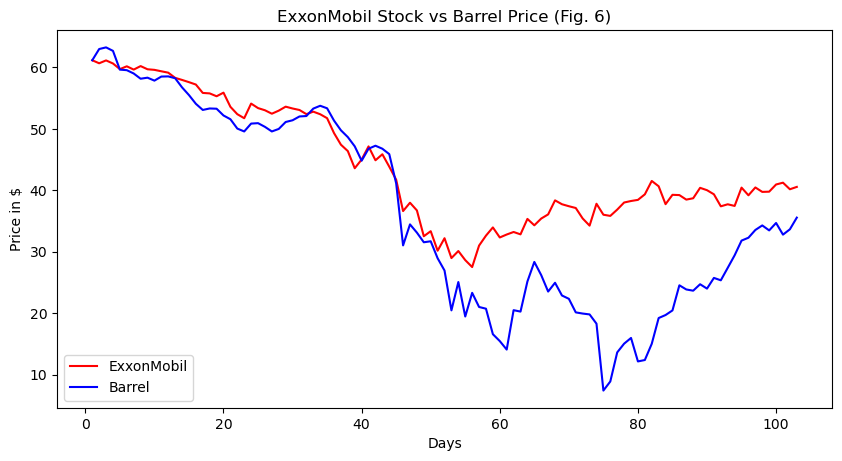

In [14]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,xom, 'r')
plt.plot(days,barrel, 'blue')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["ExxonMobil", "Barrel"],loc="lower left")
plt.title(f"ExxonMobil Stock vs Barrel Price (Fig. {v[0]})")
v[0]+=1
plt.show()

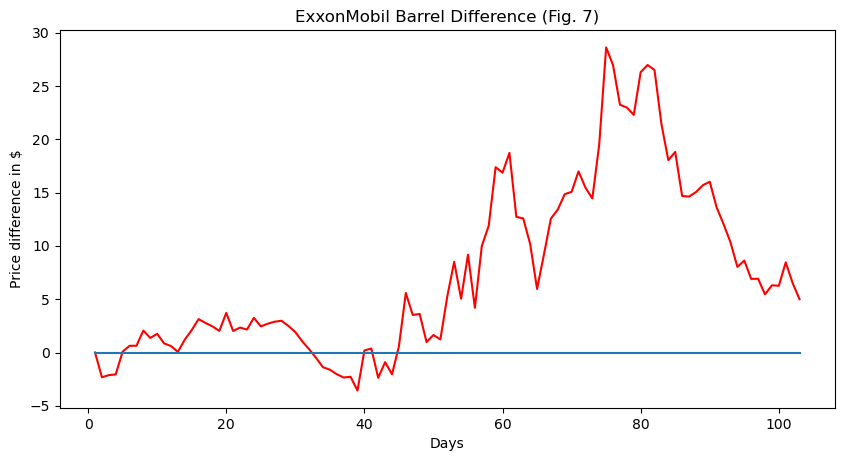

Mean of difference: 7.4441161844660195
Standard deviation of difference: 8.143664383505246
Mean of difference for first 40 days: 0.8006256749999989
Standard deviation of difference for first 40 days: 1.907166916707088


In [15]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,xom-barrel, 'r')
plt.plot(days,np.zeros_like(days))
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"ExxonMobil Barrel Difference (Fig. {v[0]})")
v[0]+=1
m1=np.mean(xom-barrel)
s1=np.std(xom-barrel)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")
m2=np.mean(xom[:40]-barrel[:40])
s2=np.std(xom[:40]-barrel[:40])
print(f"Mean of difference for first 40 days: {m2}")
print(f"Standard deviation of difference for first 40 days: {s2}")

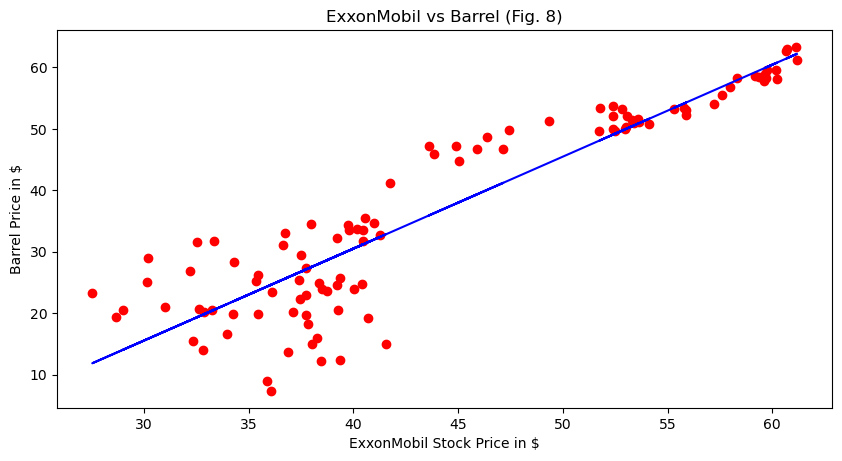

Linear fit is -29.301634351085898+1.4958117295816298*x


In [16]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(xom,barrel, 'ro')
(b1,b0)=np.polyfit(xom,barrel,1)
plt.plot(xom,b0+b1*xom,'b-')
plt.xlabel("ExxonMobil Stock Price in $")
plt.ylabel("Barrel Price in $")
plt.title(f"ExxonMobil vs Barrel (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")

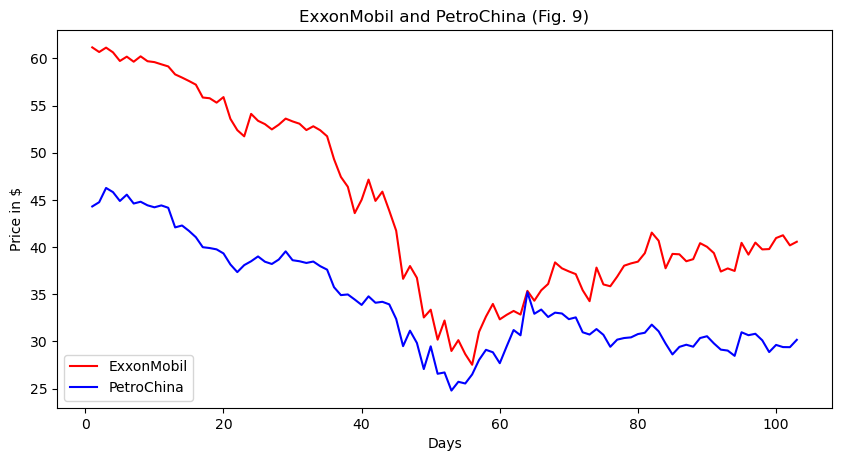

In [17]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,xom, 'r')
plt.plot(days,pc, 'blue')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["ExxonMobil", "PetroChina"],loc="lower left")
plt.title(f"ExxonMobil and PetroChina (Fig. {v[0]})")
v[0]+=1
plt.show()

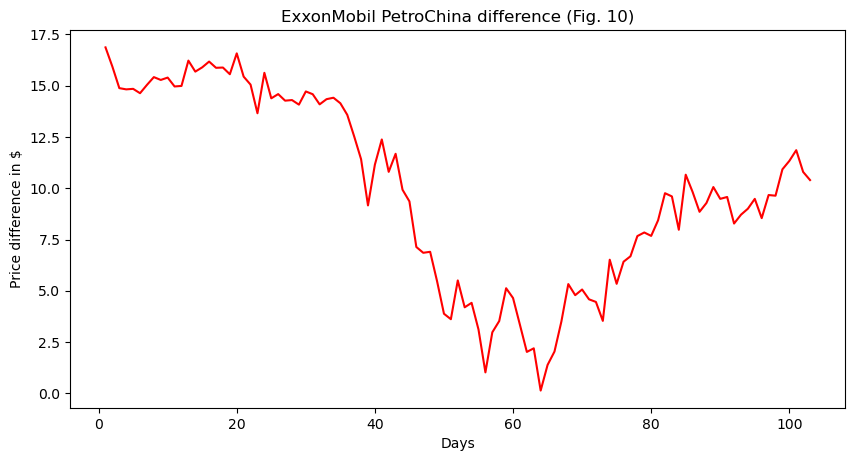

Mean of difference: 9.918193854368932
Standard deviation of difference: 4.5847231792797665
Mean of difference for 40-65 days: 5.265147359999999
Standard deviation of difference for 40-65 days: 3.3004797694021013


In [18]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,xom-pc, 'r')
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"ExxonMobil PetroChina difference (Fig. {v[0]})")
v[0]+=1
m1=np.mean(xom-pc)
s1=np.std(xom-pc)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")
m2=np.mean(xom[40:65]-pc[40:65])
s2=np.std(xom[40:65]-pc[40:65])
print(f"Mean of difference for 40-65 days: {m2}")
print(f"Standard deviation of difference for 40-65 days: {s2}")

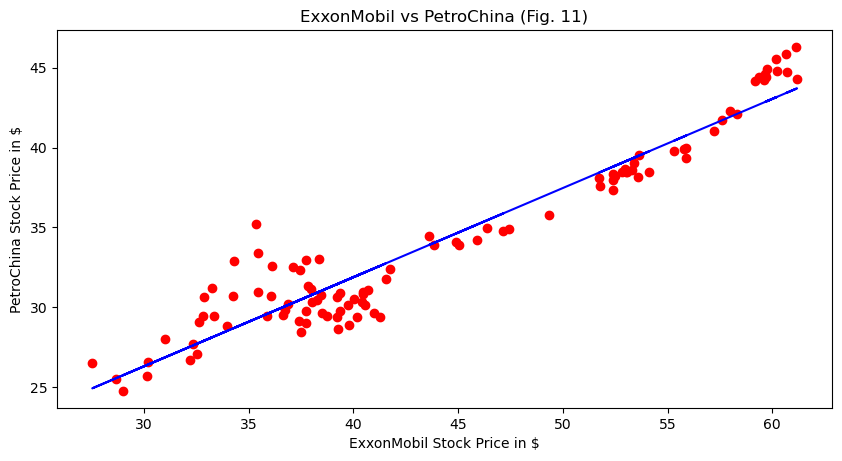

Linear fit is 9.57568241024849+0.5578046677883679*x


In [19]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(xom,pc, 'ro')
(b1,b0)=np.polyfit(xom,pc,1)
plt.plot(xom,b0+b1*xom,'b-')
plt.xlabel("ExxonMobil Stock Price in $")
plt.ylabel("PetroChina Stock Price in $")
plt.title(f"ExxonMobil vs PetroChina (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")

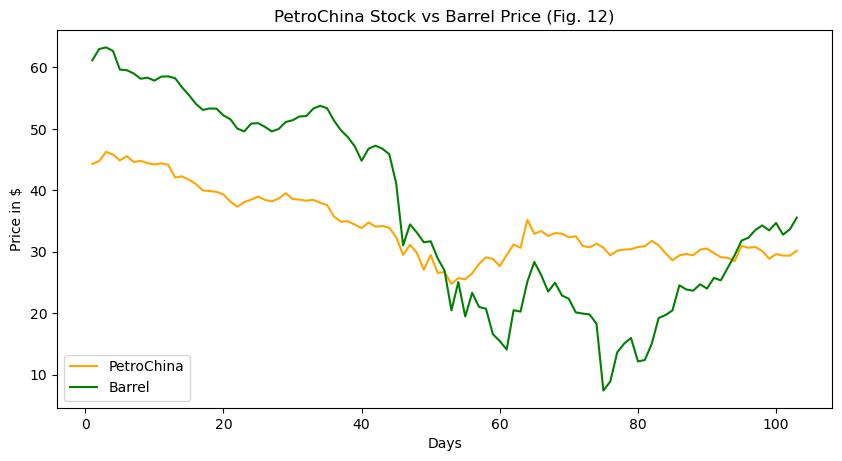

In [20]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,pc, 'orange')
plt.plot(days,barrel, 'green')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["PetroChina", "Barrel"],loc="lower left")
plt.title(f"PetroChina Stock vs Barrel Price (Fig. {v[0]})")
v[0]+=1
plt.show()

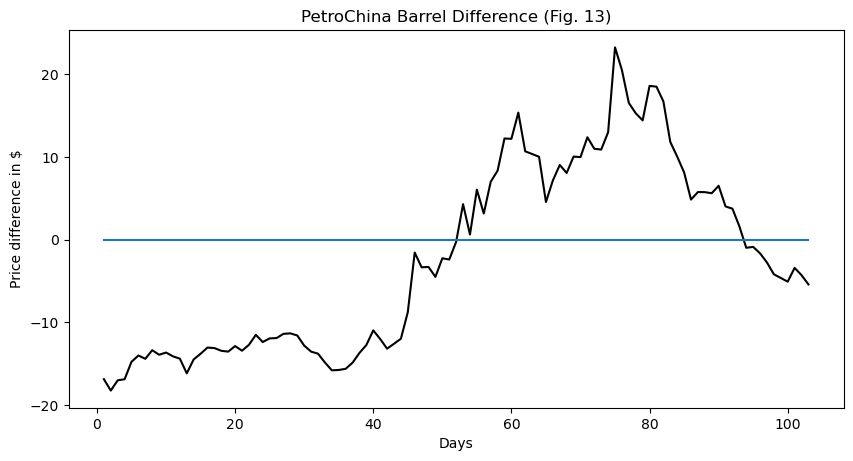

Mean of difference: -2.474077669902913
Standard deviation of difference: 11.335385136295201


In [21]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,pc-barrel, 'k')
plt.plot(days,np.zeros_like(days))
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"PetroChina Barrel Difference (Fig. {v[0]})")
v[0]+=1
m1=np.mean(pc-barrel)
s1=np.std(pc-barrel)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")

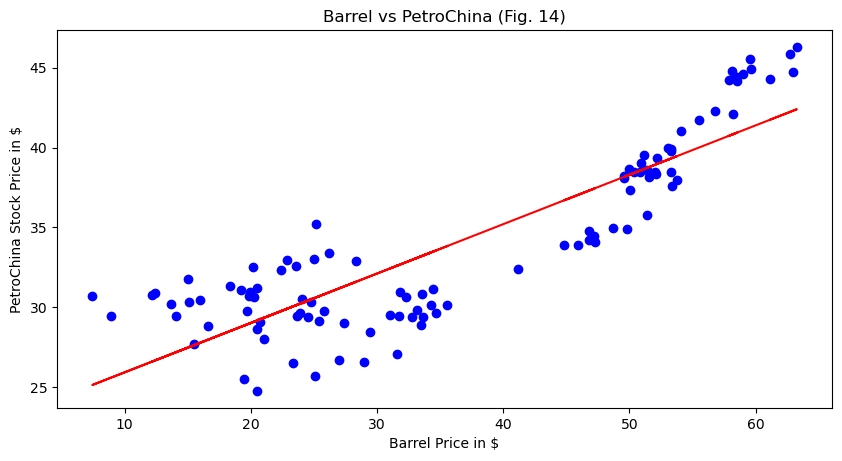

Linear fit is 22.840849202214063+0.30909408527214305*x


In [22]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(barrel,pc, 'bo')
(b1,b0)=np.polyfit(barrel,pc,1)
plt.plot(barrel,b0+b1*barrel,'r-')
plt.xlabel("Barrel Price in $")
plt.ylabel("PetroChina Stock Price in $")
plt.title(f"Barrel vs PetroChina (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")

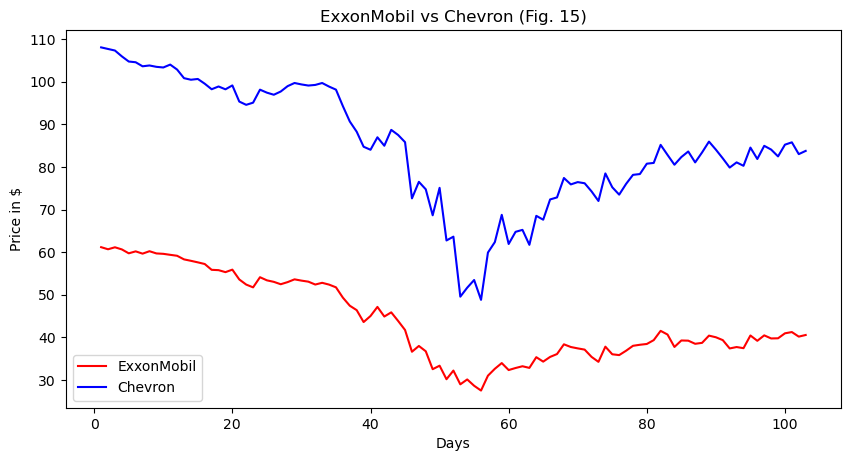

In [23]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,xom, 'r')
plt.plot(days,chev, 'blue')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["ExxonMobil", "Chevron"],loc="lower left")
plt.title(f"ExxonMobil vs Chevron (Fig. {v[0]})")
v[0]+=1
plt.show()

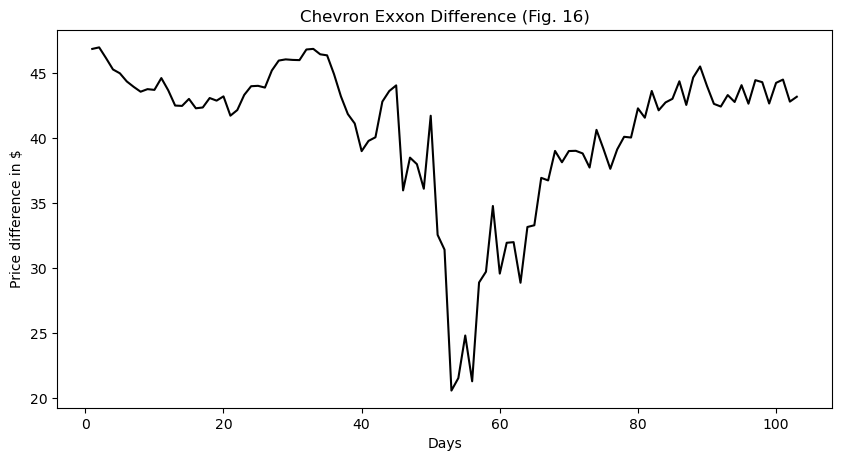

Mean of difference: 40.62360235922329
Standard deviation of difference: 5.684083573348324


In [24]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,chev-xom, 'k')
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"Chevron Exxon Difference (Fig. {v[0]})")
v[0]+=1
m1=np.mean(chev-xom)
s1=np.std(chev-xom)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")

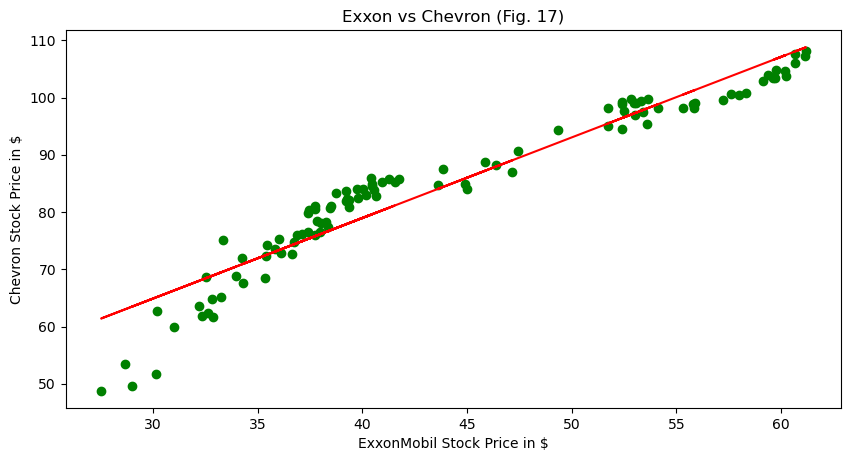

Linear fit is 22.653602371018142+1.40762801644793*x


In [25]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(xom,chev, 'go')
(b1,b0)=np.polyfit(xom,chev,1)
plt.plot(xom,b0+b1*xom,'r-')
plt.xlabel("ExxonMobil Stock Price in $")
plt.ylabel("Chevron Stock Price in $")
plt.title(f"Exxon vs Chevron (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")

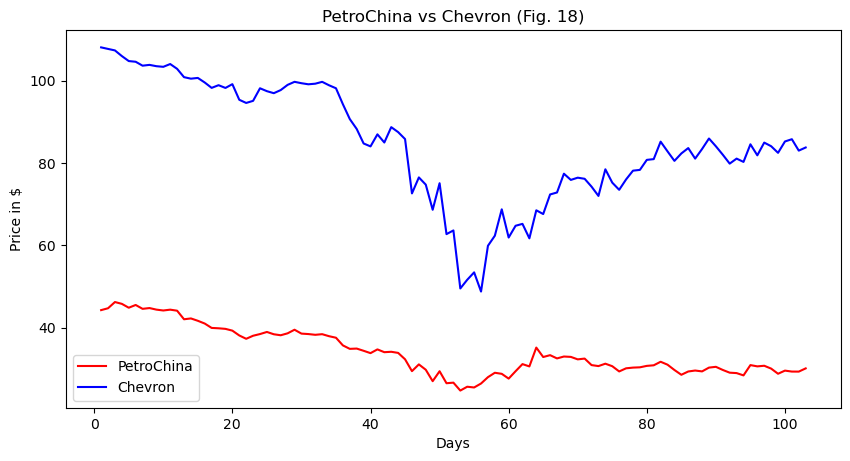

In [26]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,pc, 'r')
plt.plot(days,chev, 'blue')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["PetroChina", "Chevron"],loc="lower left")
plt.title(f"PetroChina vs Chevron (Fig. {v[0]})")
v[0]+=1
plt.show()

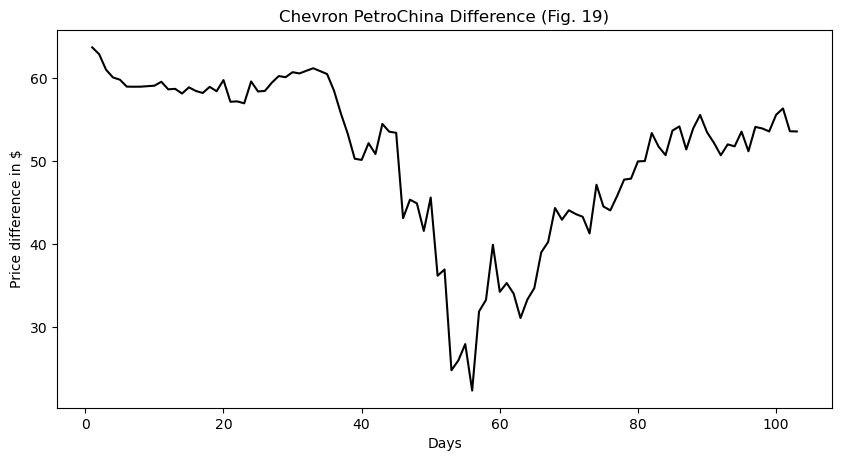

Mean of difference: 50.541796213592235
Standard deviation of difference: 9.64558207772795


In [27]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,chev-pc, 'k')
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"Chevron PetroChina Difference (Fig. {v[0]})")
v[0]+=1
m1=np.mean(chev-pc)
s1=np.std(chev-pc)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")

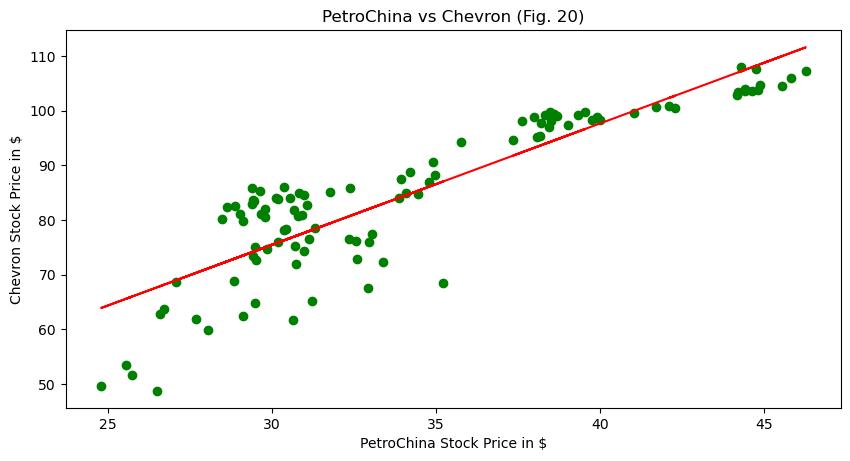

Linear fit is 8.915478398506076+2.2183508713719884*x


In [28]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(pc,chev, 'go')
(b1,b0)=np.polyfit(pc,chev,1)
plt.plot(pc,b0+b1*pc,'r-')
plt.xlabel("PetroChina Stock Price in $")
plt.ylabel("Chevron Stock Price in $")
plt.title(f"PetroChina vs Chevron (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")

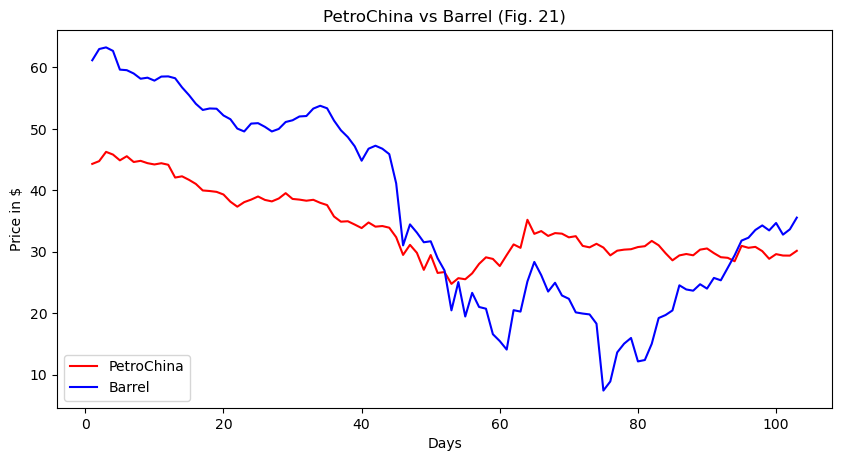

In [29]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,pc, 'r')
plt.plot(days,barrel, 'blue')
plt.xlabel("Days")
plt.ylabel("Price in $")
plt.legend(["PetroChina", "Barrel"],loc="lower left")
plt.title(f"PetroChina vs Barrel (Fig. {v[0]})")
v[0]+=1
plt.show()

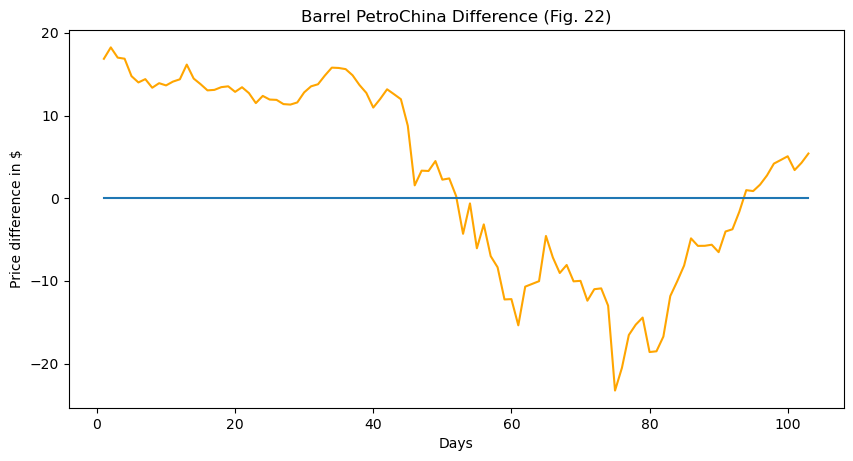

Mean of difference: 2.474077669902913
Standard deviation of difference: 11.335385136295201


In [30]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(days,barrel-pc, 'orange')
plt.xlabel("Days")
plt.ylabel("Price difference in $")
plt.title(f"Barrel PetroChina Difference (Fig. {v[0]})")
plt.plot(days,np.zeros_like(days))
v[0]+=1
m1=np.mean(barrel-pc)
s1=np.std(barrel-pc)
plt.show()
print(f"Mean of difference: {m1}")
print(f"Standard deviation of difference: {s1}")

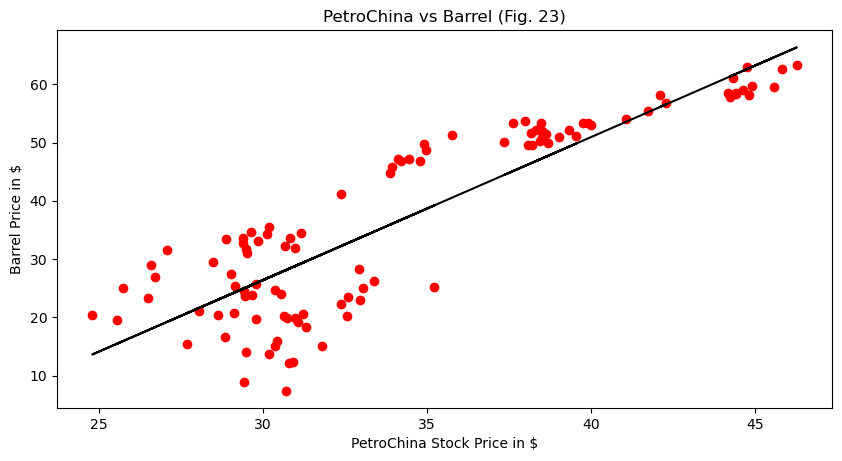

Linear fit is -47.24611058906604+2.455248455056479*x


In [31]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(pc,barrel, 'ro')
(b1,b0)=np.polyfit(pc,barrel,1)
plt.plot(pc,b0+b1*pc,'k-')
plt.xlabel("PetroChina Stock Price in $")
plt.ylabel("Barrel Price in $")
plt.title(f"PetroChina vs Barrel (Fig. {v[0]})")
v[0]+=1
plt.show()
print(f"Linear fit is {b0}+{b1}*x")

### $\color{orange}{\text{POINT ESTIMATES AND INTERVAL ESTIMATES}}$

#### CLT and Unbiased estimators

In [34]:
# estimation of population mean and verification of gaussian distribution of scaled and shifted sample parameter
from numpy.random import choice
def xbar_gen(dataset,n_samp):
    avgs = np.array([np.mean(choice(dataset,n_samp,replace=False)) for i in range(10000)])
    return avgs


 

In [35]:
x_bar_xom=xbar_gen(xom,20)
x_bar_chev=xbar_gen(chev,20)
x_bar_pc=xbar_gen(pc,20)
x_bar_barrel=xbar_gen(barrel,20)

In [51]:
xs=np.linspace(30,55,1000)
ys=stats.norm.pdf(xs,np.mean(xom),np.std(xom)/np.sqrt(20))
y=np.linspace(0,0.22,5)
x=[np.mean(xom) for i in y]

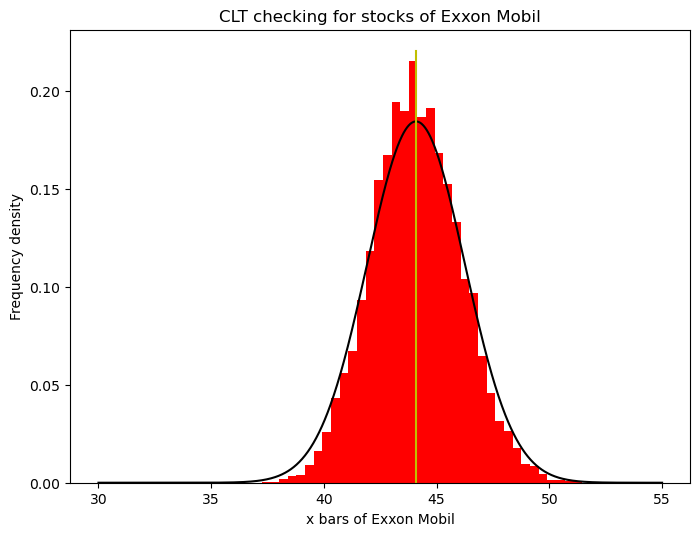

In [57]:
plt.figure(figsize=(8,6),dpi=100)
plt.hist(x_bar_xom,bins=40,density=True,color="red")
plt.plot(xs,ys,'k',markersize=50)
plt.plot(x,y,'y-',markersize=100)
plt.xlabel("x bars of Exxon Mobil")
plt.ylabel("Frequency density")
plt.title("CLT checking for stocks of Exxon Mobil")
plt.show()

Its evident that the sample parameter ie sample mean follows a gaussian distribution for sample size 20 which is quite large and the expected value of sample mean matches with the mean of the population hence CLT is satisfied

In [59]:
xs=np.linspace(70,100,1000)
ys=stats.norm.pdf(xs,np.mean(chev),np.std(chev)/np.sqrt(20))
y=np.linspace(0,0.14,5)
x=[np.mean(chev) for i in y]

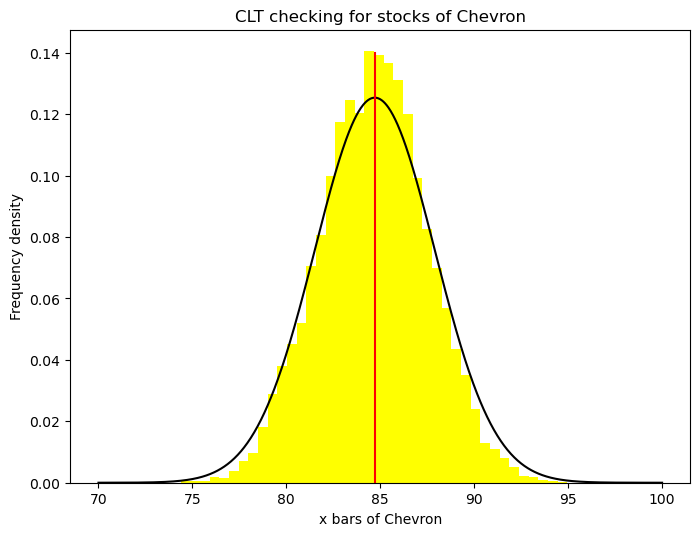

In [62]:
plt.figure(figsize=(8,6),dpi=100)
plt.hist(x_bar_chev,bins=40,density=True,color="yellow")
plt.plot(xs,ys,'k',markersize=50)
plt.plot(x,y,'r-',markersize=100)
plt.xlabel("x bars of Chevron")
plt.ylabel("Frequency density")
plt.title("CLT checking for stocks of Chevron")
plt.show()

In [65]:
xs=np.linspace(30,40,1000)
ys=stats.norm.pdf(xs,np.mean(pc),np.std(pc)/np.sqrt(20))
y=np.linspace(0,0.35,5)
x=[np.mean(pc) for i in y]

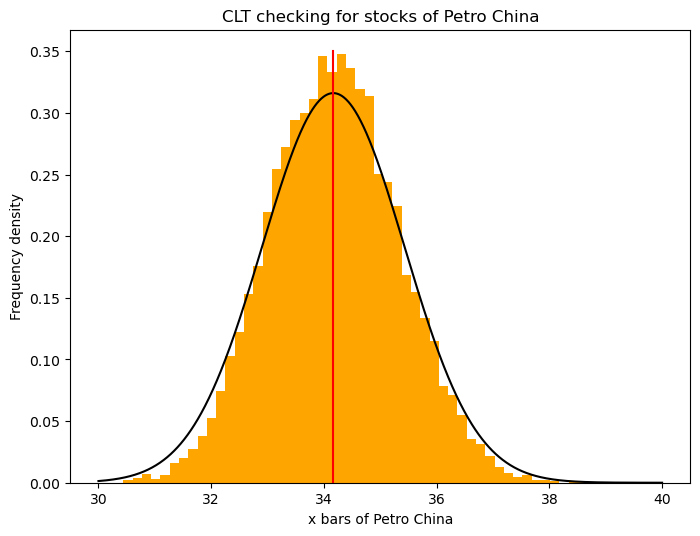

In [67]:
plt.figure(figsize=(8,6),dpi=100)
plt.hist(x_bar_pc,bins=50,density=True,color="orange")
plt.plot(xs,ys,'k',markersize=50)
plt.plot(x,y,'r-',markersize=100)
plt.xlabel("x bars of Petro China")
plt.ylabel("Frequency density")
plt.title("CLT checking for stocks of Petro China")
plt.show()

In [72]:
xs=np.linspace(23,50,1000)
ys=stats.norm.pdf(xs,np.mean(barrel),np.std(barrel)/np.sqrt(20))
y=np.linspace(0,0.12,5)
x=[np.mean(barrel) for i in y]

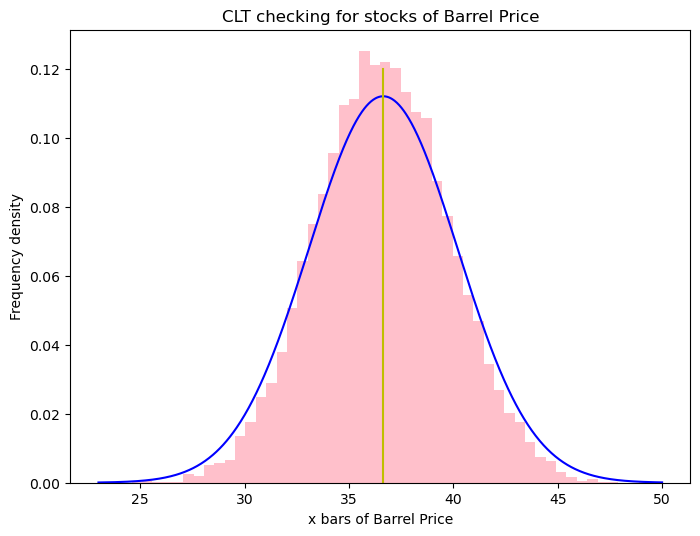

In [76]:
plt.figure(figsize=(8,6),dpi=100)
plt.hist(x_bar_barrel,bins=50,density=True,color="pink")
plt.plot(xs,ys,'b-',markersize=50)
plt.plot(x,y,'y-',markersize=100)
plt.xlabel("x bars of Barrel Price")
plt.ylabel("Frequency density")
plt.title("CLT checking for stocks of Barrel Price")
plt.show()

#### Interval Estimates

we are going to find the 95% confidence intervals in which population mean may lie for a sample from each dataset

In [78]:
Z = stats.norm.ppf(1-0.025) # Z aplha/2 where alpha is 5 %
# this is a useful constant 

In [79]:
# sample generation ie returns mean of a sample
def sample_gen(dataset,n_samp):
    return np.mean(choice(dataset,n_samp,replace=False))
xom_x=sample_gen(xom,20)
chev_x=sample_gen(chev,20)
pc_x=sample_gen(pc,20)
barrel_x=sample_gen(barrel,20)

In [83]:
def error_gen(dataset,n):
    return Z*np.std(dataset)/np.sqrt(n)

In [94]:
# 95% confidence interval PRINTING
#Exxon Mobil CI
print('95% CI for mean stock price of Exxon Mobil is [' ,xom_x - error_gen(xom,20),',',xom_x + error_gen(xom,20),' ]')
print('mean of stocks of Exxon Mobil is', np.mean(xom))
print()
#Chevron CI
print('95% CI for mean stock price of Chevron is [' ,chev_x - error_gen(chev,20),',',chev_x + error_gen(chev,20),' ]')
print('mean of stocks of Chevron is', np.mean(chev))
print()
#Petro China CI 
print('95% CI for mean stock price of Petro China is [' ,pc_x - error_gen(pc,20),',',pc_x + error_gen(pc,20),' ]')
print('mean of stocks of Petro China is', np.mean(pc))
print()
# Barrel CI 
print('95% CI for mean  price of Barrel is [' ,barrel_x - error_gen(barrel,20),',',barrel_x + error_gen(barrel,20),' ]')
print('mean of price of Barrel is', np.mean(barrel))


95% CI for mean stock price of Exxon Mobil is [ 39.70387562614048 , 48.19188107385951  ]
mean of stocks of Exxon Mobil is 44.0843103592233

95% CI for mean stock price of Chevron is [ 77.56241374160074 , 90.03658525839926  ]
mean of stocks of Chevron is 84.70791271844661

95% CI for mean stock price of Petro China is [ 34.15221395158129 , 39.09978604841871  ]
mean of stocks of Petro China is 34.16611650485437

95% CI for mean  price of Barrel is [ 29.3173854830546 , 43.26161451694541  ]
mean of price of Barrel is 36.64019417475728


The means lie in the corresponding interval because 95% is a very high probability

## $\color{blue}{\text{Hypothesis Testing}}$

We must put forward a hypothesis that must be tested:<BR>
The relation btw means of barrel and stock prices of various companies
    

In [96]:
print('mean of stocks of Exxon Mobil is', np.mean(xom))
print('mean of stocks of Chevron is', np.mean(chev))
print('mean of stocks of Petro China is', np.mean(pc))
print('mean of price of Barrel is', np.mean(barrel))

mean of stocks of Exxon Mobil is 44.0843103592233
mean of stocks of Chevron is 84.70791271844661
mean of stocks of Petro China is 34.16611650485437
mean of price of Barrel is 36.64019417475728


Exxon Mobil and Chevron has sample mean ( of available sample ) greater than that of Barrel price meanwhile Petro China has lower mean than Barrel
. However this data is only over 103 days but we need to have an idea about the relation between their lifetime ( global ) means ie mean over infinite ( practically ) . So we apply Hypothesis testing for the available sample.

#### $\color{lime}{\text{Exxon Mobil vs Barrel}}$

$\color{yellow}{\text{Null Hypothesis :}}$ $\mu _{Exxon Mobil} = \mu_{Barrel}$ <br>
$\color{cyan}{\text{Alternate Hypothesis :}}$ $\mu _{Exxon Mobil} > \mu_{Barrel}$ <br>
We have $\bar{x}$ values for a sample of 103 data points for both Exxon Mobil and Barrel and lets assume that their original standard deviations are unknown and unequal. Hence our test variable is $$T= \frac{\bar{X_1} - \bar{X_2} - (\mu_1 - \mu_2)}{\sqrt{{S_1}^{2}  +  {S_2}^{2} }} \sqrt{N}$$ where N is 103 and we are going to apply this model for all the following hypothesis tests. For this case 1 represents exxon mobil and p value is the probability that t > T and usually T follows a t distribution with degree of freedom given by the formula $$ (N-1)\frac{(S_1^2 + S_2 ^2)^2}{S_1^4 + S_2^4}$$  and level of significance is 0.05


In [112]:
# Computation of T
T = ( np.mean(xom) - np.mean(barrel))*np.sqrt(103)/np.sqrt(np.var(xom,ddof=1) + np.var(barrel,ddof=1))
print(T ,'T value')
#compuation of degree of freedom 
deg =int( 102*((np.var(xom,ddof=1) +np.var(barrel,ddof=1))**2)/((np.var(xom,ddof=1)**2 +np.var(barrel,ddof=1)**2)))
print('degree' , deg ) 
# p value calculation (assume level of significance as 0.05)
p_val = 1 - stats.t.cdf(T,df=deg)
p_val

4.0368041951006415 T value
degree 168


4.109478601921346e-05

here p- value  is way less than the level of significance hence we reject the null hypothesis and we can conclude that the global mean of Exxon Mobile stocks may be greater than that of barrel prices

#### $\color{lime}{\text{Chevron vs Barrel}}$

$\color{yellow}{\text{Null Hypothesis :}}$ $\mu _{Chevron} = \mu_{Barrel}$ <br>
$\color{cyan}{\text{Alternate Hypothesis :}}$ $\mu _{Chevron} > \mu_{Barrel}$ <br>

In [113]:
# Computation of T
T = ( np.mean(chev) - np.mean(barrel))*np.sqrt(103)/np.sqrt(np.var(chev,ddof=1) + np.var(barrel,ddof=1))
print(T ,'T value')
#compuation of degree of freedom 
deg =int( 102*((np.var(chev,ddof=1) +np.var(barrel,ddof=1))**2)/((np.var(chev,ddof=1)**2 +np.var(barrel,ddof=1)**2)))
print('degree' , deg ) 
# p value calculation (assume level of significance as 0.05)
p_val = 1 - stats.t.cdf(T,df=deg)
p_val

22.743318214465212 T value
degree 201


0.0

Here again the p value is very small and off the limits of computer hence we reject the null hypothesis and can proceed to establish the alternate hypthesis which matches with the sample data

#### $\color{lime}{\text{Petro China vs Barrel}}$

$\color{yellow}{\text{Null Hypothesis :}}$ $\mu _{Petro China} = \mu_{Barrel}$ <br>
$\color{cyan}{\text{Alternate Hypothesis :}}$ $\mu _{Petro China} < \mu_{Barrel}$ <br>

In [115]:
# Computation of T
T = -( np.mean(pc) - np.mean(barrel))*np.sqrt(103)/np.sqrt(np.var(pc,ddof=1) + np.var(barrel,ddof=1))
print(T ,'T value')
#compuation of degree of freedom 
deg =int( 102*((np.var(pc,ddof=1) +np.var(barrel,ddof=1))**2)/((np.var(pc,ddof=1)**2 +np.var(barrel,ddof=1)**2)))
print('degree' , deg ) 
# p value calculation (assume level of significance as 0.05)
p_val = 1 - stats.t.cdf(T,df=deg)
p_val

1.480245643065508 T value
degree 127


0.07064209986864578

Here the p_value is 0.07 which is higher than level of significance 0.05 henec we fail to reject the null hypothesis based on the available data